# Project: Investigate a Dataset (The Movie Database - TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#questions'>Questions I am going to ask and find</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have selected TMDB Movie dataset which contains over 10,000 movies including user rating, authors, budget and revenue. In the following I will descirbe my understnding about columns of the table. 
 - `id` - Unique id of each movie
 - `imdb_id` - Unique ID to access the movie from IMDB (https://www.imdb.com/title/tt0369610/)
 - `popularity` - Popularity range from 0 to 33.
 - `budget` - Estimated budget in dollars (precise to extracted date)
 - `revenue` -  Revenue in dollars (precise to extracted date)
 - `original_title` - Title of the movie
 - `cast` - Top actors/actresses/cast
 - `homepage` - web home page address
 - `director` - director name
 - `tagline` - short text like search keyword
 - `keywords` - movie keywords, need to split by |
 - `overview` - Short description/storyline
 - `runtime` - duration of the movie
 - `genres` - genres need to split by |
 - `production_companies` - productioners, need to split by |
 - `release_date` - Released date
 - `vote_count` - integer
 - `vote_average` - average vote
 - `budget_adj, revenue_adj` - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars
 
<a id='questions'></a> 
 ### Questions I am going to ask and find. 
<ul>
<li><a href="#q1">Which genres are most popular from year to year? </a></li>
<li><a href='#q2'>What kinds of properties are associated with movies that have high revenues?</a></li>
<li><a href="#q3">Which movies made the most profit, yearly?</a></li>
</ul>

In [1]:
import pandas as pd # CSV reader pandas library
import matplotlib.pyplot as plt # Matplotlib for styling
import seaborn as sns # Seaborn data visualization library
import matplotlib.pyplot as plt # Matplotlib for styling
import matplotlib.ticker as ticker #tick locators and formatters
import numpy as np # Numpy library
#to draw the graphs inline
%matplotlib inline 
pd.options.mode.chained_assignment = None

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
### Importing city_list.csv file into city_lists file object
df = pd.read_csv('./dataset/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# printing columns
print('Columns : ', df.columns)

# To print the size of the table
print('Size of the table: ', df.shape)

# To determine the range of pupularity in the dataset
max_popularity =  df['popularity'].max()
min_popularity =  df['popularity'].min()
print('Min value in popularity: ', '{0:.6f}'.format(max_popularity))
print('Max value in popularity: ', '{0:.6f}'.format(min_popularity))

Columns :  Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')
Size of the table:  (10866, 21)
Min value in popularity:  32.985763
Max value in popularity:  0.000065


In [4]:
# to determine, if release_year have missing value
null_data_release_year = df[df['release_year'].isnull()]
null_data_release_year.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [5]:
# to determine, if release_year have missing value
null_data_genres = df[df['genres'].isnull()]
# null_data_genres.shape
null_data_genres.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0


### Data Cleaning (Dropping, unique, merging, grouping, duplicate values)
To answer Q1(Question - 1), I decided to transform given dataframe to `df_q1` which will be comfortable to draw barplot. The answer of the question 1 can be found in `release_year` and `genres`.
Therefore, I did some cleaning process as following to above mentioned columns. 

In [6]:
# to select non-null genres with release_year for Question 1 (Q1)
df_q1 = df.dropna(subset=['genres'])[['release_year','genres']]

# To determine the non-null values lengh
print('Lenght of Q1 dataset : ', len(df_q1))
df_q1.head(4)

Lenght of Q1 dataset :  10843


,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy


In [7]:
# Finding the unique values of the year
df_q1['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

In [8]:
# Grouping all other genres in the same year by using `|` character
df_q1['genres']= df_q1.groupby('release_year')['genres'].transform(lambda x: '|'.join(x))
df_q1.head()

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller|Acti...
1,2015,Action|Adventure|Science Fiction|Thriller|Acti...
2,2015,Action|Adventure|Science Fiction|Thriller|Acti...
3,2015,Action|Adventure|Science Fiction|Thriller|Acti...
4,2015,Action|Adventure|Science Fiction|Thriller|Acti...


In [9]:
#droping duplicate values after merging dataset of `df_q1`
df_q1 = df_q1.drop_duplicates()

# sorting values to draw barplot in ascending order
df_q1 = df_q1.sort_values(by=['release_year'])

In [10]:
# to check if release_year is sorted
df_q1.head(4)

,release_year,genres
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...
10438,1963,Action|Thriller|Adventure|Animation|Family|Hor...


In [11]:
# to check if genres is merged correctly by manually checking original dataframe
df_q1['genres'][10141]

'Drama|Horror|Thriller|Action|Adventure|Western|Action|Drama|History|Comedy|Drama|Romance|Comedy|Romance|Thriller|Adventure|Fantasy|Science Fiction|Romance|Horror|Thriller|Adventure|Family|Thriller|Music|Comedy|Crime|Action|Drama|Western|Comedy|Drama|Romance|Horror|Horror|Thriller|Drama|Crime|Western|Action|Western|Action|Drama|Romance|Western|Drama|Family|Thriller|Comedy|Action|Adventure|Drama|History|Western|Action|Drama|Foreign|History|War|Drama|History|Adventure|Fantasy|Science Fiction|Drama|Comedy|Horror|Science Fiction|Comedy|Family|Horror|Comedy|Romance|Horror|Action|Drama|History|War'

In [12]:
# shape should be equal to df_q1['release_year'].unique() value, manually checked
df_q1.shape

(56, 2)

<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Research Question 1 (Which genres are most popular from year to year?)

To Explore Question 1 visually, I have to split genres by `|` character and should create columns to each genre with argument `count` values.

Function `get_genre_frequency` splits the genres and return it as `numpy.ndarray` like tuple. So, it returns `unique` - unique genre name and `counts` - counts the number of its appearance 

In [13]:
def get_genre_frequency(genres):
    array = np.array(genres.split('|'))
    (unique, counts) = np.unique(array, return_counts=True)
    return np.asarray((unique, counts)).T

Function `create_each_genre_columns`. Here, I am transferring all genres values into columns which is resulted from `get_genre_frequency` function.

In [14]:
def create_each_genre_columns(np_genre_frequencies, df, ind):
    for unique, counts in np_genre_frequencies:
        if unique not in df.columns:
            df[unique] = 0
        df[unique][ind] = counts
    return df

Function  `create_the_most_popular_genre_columns` is created to visualize the winner of the genres from year to year.

In [15]:
def create_the_most_popular_genre_columns(np_genre_frequencies, df, ind):
    df['popular_genre_count'] = df.iloc[:, 4:].max(axis=1)
    df['popular_genre_name'] = df.iloc[:, 4:].idxmax(axis=1)
    return df
    
    

Here I am running above 3 functions to create `df_q1` by considering index.

In [16]:
df_q1['popular_genre_name'] = 'UNKNOWN'
df_q1['popular_genre_count'] = 0
for ind in df_q1.index:   
    np_genre_frequencies = get_genre_frequency(df_q1['genres'][ind])
    df_q1 = create_each_genre_columns(np_genre_frequencies, df_q1, ind)
    df_q1 = create_the_most_popular_genre_columns(np_genre_frequencies, df_q1, ind)

df_q1.head(10)

,release_year,genres,popular_genre_name,popular_genre_count,Action,Adventure,Comedy,Crime,Drama,Family,...,Music,Romance,Science Fiction,Thriller,War,Western,Animation,Mystery,TV Movie,Documentary
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...,Drama,13,8,5,8,2,13,3,...,1,6,3,6,2,6,0,0,0,0
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,16,7,6,10,2,16,5,...,2,7,4,0,2,3,1,1,0,0
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,21,8,7,5,3,21,2,...,1,5,2,7,3,3,0,4,0,0
10438,1963,Action|Thriller|Adventure|Animation|Family|Hor...,Comedy,13,4,7,13,4,13,3,...,0,8,2,10,1,2,1,6,0,0
9881,1964,Adventure|Action|Thriller|Drama|Comedy|War|Com...,Drama,20,5,5,16,10,20,4,...,5,9,4,9,3,1,2,4,0,0
10689,1965,Adventure|Action|Thriller|Drama|Family|Music|R...,Drama,20,9,6,7,2,20,3,...,2,5,2,11,8,4,1,3,1,0
10820,1966,Animation|Family|Comedy|Drama|Science Fiction|...,Comedy,16,14,11,16,5,16,7,...,0,6,6,8,4,7,3,6,0,1
10398,1967,Family|Animation|Adventure|Comedy|Drama|Romanc...,Comedy,17,7,7,17,7,16,3,...,5,11,4,5,1,2,2,3,0,1
9719,1968,Science Fiction|Mystery|Adventure|Adventure|Sc...,Drama,20,6,5,9,5,20,5,...,3,6,4,5,4,1,3,4,0,0
10724,1969,Adventure|Action|Thriller|History|Drama|Wester...,Drama,13,10,5,12,3,13,4,...,2,4,3,3,3,7,3,1,1,0


In [17]:
# if 'genres' in df_q1.columns:
#     del df_q1['genres']

# Ranaming release_year to Years for convinience
df_q1.rename(columns={'release_year': 'Years'}, inplace=True)
df_q1.head(3)

,Years,genres,popular_genre_name,popular_genre_count,Action,Adventure,Comedy,Crime,Drama,Family,...,Music,Romance,Science Fiction,Thriller,War,Western,Animation,Mystery,TV Movie,Documentary
10141,1960,Drama|Horror|Thriller|Action|Adventure|Western...,Drama,13,8,5,8,2,13,3,...,1,6,3,6,2,6,0,0,0,0
10110,1961,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,16,7,6,10,2,16,5,...,2,7,4,0,2,3,1,1,0,0
9849,1962,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,21,8,7,5,3,21,2,...,1,5,2,7,3,3,0,4,0,0


In [18]:
# This cells code has been copied from here 
#[https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5]
# Aim of this function is to change the position of the columns
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [19]:
# I am changing position of `Years` column with `popular_genre_count` column, this is necesarry for slicing of DataFrame
df_q1 = movecol(df_q1, 
             cols_to_move=['popular_genre_count','Years'], 
             ref_col='popular_genre_name',
             place='After')
df_q1.head(3)

,genres,popular_genre_name,popular_genre_count,Years,Action,Adventure,Comedy,Crime,Drama,Family,...,Music,Romance,Science Fiction,Thriller,War,Western,Animation,Mystery,TV Movie,Documentary
10141,Drama|Horror|Thriller|Action|Adventure|Western...,Drama,13,1960,8,5,8,2,13,3,...,1,6,3,6,2,6,0,0,0,0
10110,Adventure|Animation|Comedy|Family|Comedy|Drama...,Drama,16,1961,7,6,10,2,16,5,...,2,7,4,0,2,3,1,1,0,0
9849,Adventure|Action|Thriller|Adventure|Drama|Hist...,Drama,21,1962,8,7,5,3,21,2,...,1,5,2,7,3,3,0,4,0,0


In [20]:
# to count number of unique genre movies in the dataset, manually
df_q1.columns

Index(['genres', 'popular_genre_name', 'popular_genre_count', 'Years',
       'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western', 'Animation', 'Mystery', 'TV Movie',
       'Documentary'],
      dtype='object')

###  Answer to Q1 (Question 1).
It is obvious that `Drama` genres movies is the most popular from the below bar plot. However, rarely we can see `comedy` genre movies can beat the `Drama` genre movies.

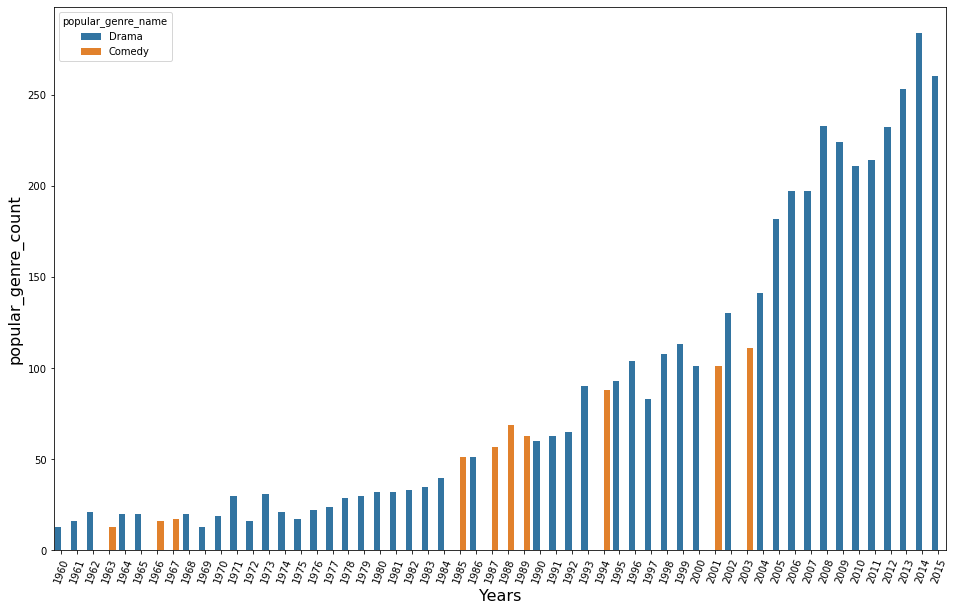

In [21]:
# Here I am using `Years`, `popular_genre_count` and `popular_genre_name` columns to draw bar plot
fig, ax1 = plt.subplots(figsize=(16, 10))
# ax1.set_title(title, fontsize=16)
ax1.set_xlabel('Years', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1 = sns.barplot(x='Years', y='popular_genre_count', hue='popular_genre_name', data=df_q1)
plt.xticks(rotation=70)
plt.show()
sns.despine(fig)

#### To explore all other genres, I decided to draw bar plot by slicing the `df_q1` dataframe within 15 years

In [22]:
# to change the width of barplot
def change_width(ax, new_value) :
        for patch in ax.patches :
            current_width = patch.get_width()
            diff = current_width - new_value

            # change the bar width
            patch.set_width(new_value)

            # I recenter the bar
            patch.set_x(patch.get_x() + diff * .5)

In [23]:
# to draw the bar plot by grouping them yearly
def draw_bar_plot(title, df):
    df1 = df.iloc[:, 2:]
    fig, ax1 = plt.subplots(figsize=(16, 10))
    ax1.set_title(title, fontsize=16)
    ax1.set_xlabel('Years', fontsize=16)
    ax1.set_ylabel('Count', fontsize=16)
    tidy = df1.melt(id_vars='Years').rename(columns=str.title)   
    ax1 = sns.barplot(x='Years', y='Value', hue='Variable', data=tidy)
    plt.xticks(rotation=70)
    change_width(ax1, .15)
    plt.show()
    sns.despine(fig)

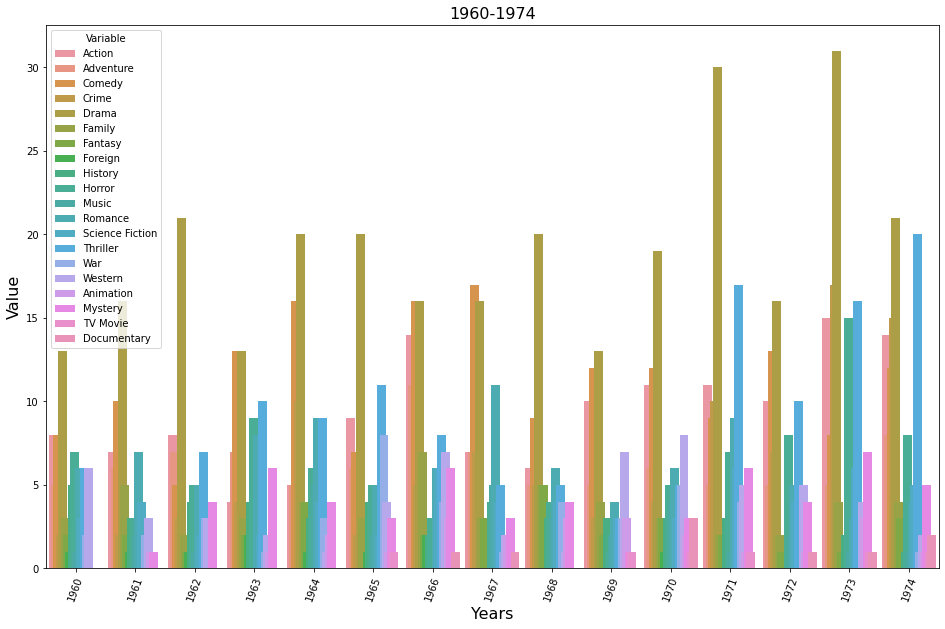

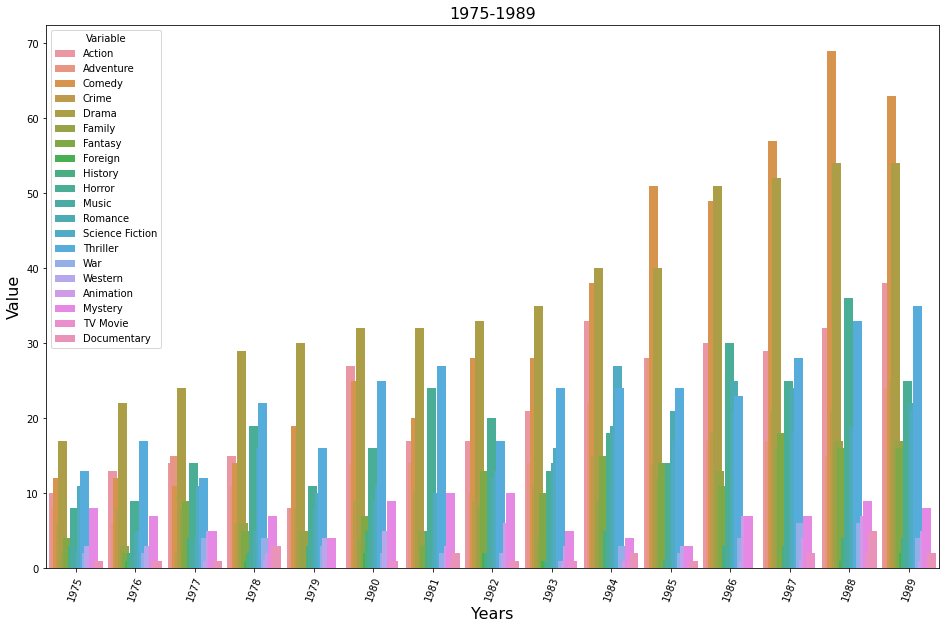

In [24]:
# Bar Plot of all Genres from 1960 to 1989
df_q1_1 = df_q1.iloc[:15, 1:]
draw_bar_plot('1960-1974', df_q1_1)

df_q1_2 = df_q1.iloc[15:30,1:]
draw_bar_plot('1975-1989', df_q1_2)

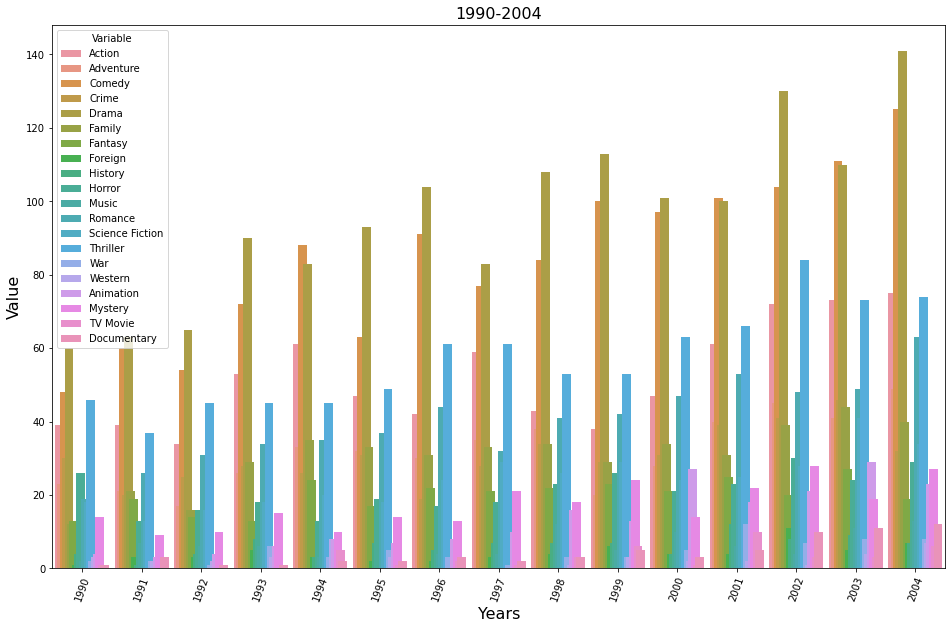

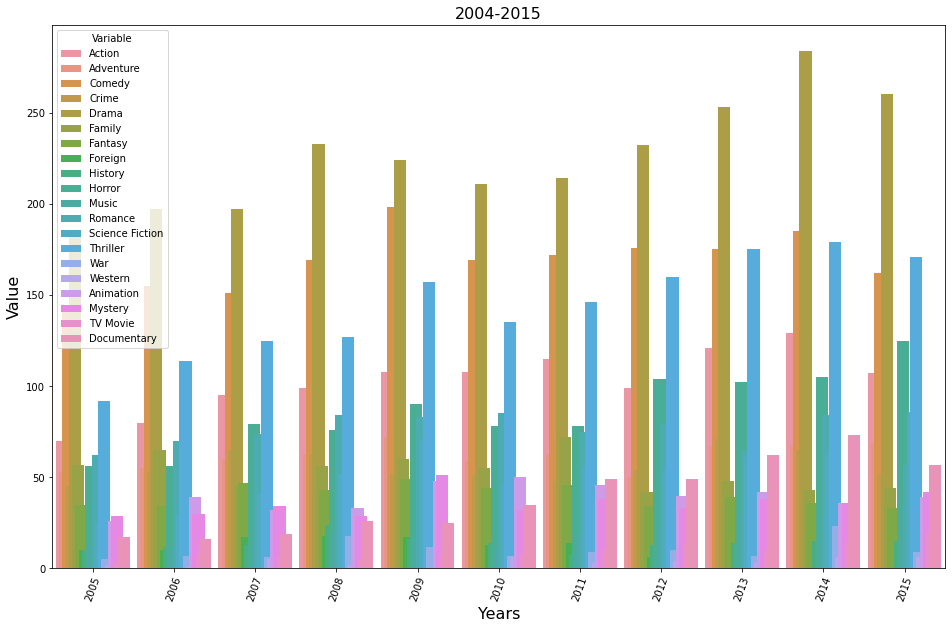

In [25]:
# Bar Plot of all Genres from 1989 to 2015
df_q1_3 = df_q1.iloc[30:45,1:]
draw_bar_plot('1990-2004', df_q1_3)

df_q1_4 = df_q1.iloc[45:56,1:]
draw_bar_plot('2004-2015', df_q1_4)

<a id='q2'></a>
### Research Question 2  (Q2.What kinds of properties are associated with movies that have high revenues?)
To answer the question following posts' idea is partially used https://towardsdatascience.com/correlation-is-simple-with-seaborn-and-pandas-28c28e92701e. None of code is copied!

In [26]:
# to see the highest revenue value
df_q2 = df.sort_values(by ='revenue', ascending=False)
df_q2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [27]:
def plot_correlation(xPlot, YPlot, df, title, isCurrency):
    fig, ax1 = plt.subplots(figsize=(7, 4)) 
    ax1 = sns.regplot(x=xPlot, y=YPlot, data=df);
    ax1.set_title(title, fontsize=16)
    ax1.set(xlim = (min(df[xPlot]),max(df[xPlot])))
    ax1.set(ylim = (min(df[YPlot]),max(df[YPlot])))

    xlabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_xticks()/1000000000]
    ticks_loc = ax1.get_xticks().tolist()
    ax1.xaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
    ax1.set_xticklabels(xlabels)
    ax1.xaxis.set_tick_params(which='major', labelcolor='green')
    
    if isCurrency:
        ylabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_yticks()/1000000000]
        ticks_loc = ax1.get_yticks().tolist()
        ax1.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
        ax1.set_yticklabels(ylabels)
        ax1.yaxis.set_tick_params(which='major', labelcolor='green',
                             labelleft=True, labelright=False)

    plt.show()

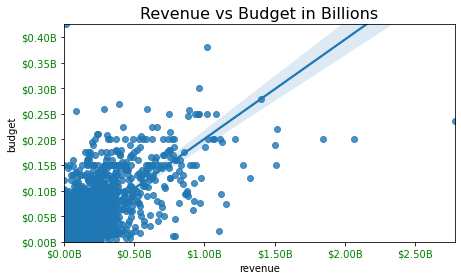

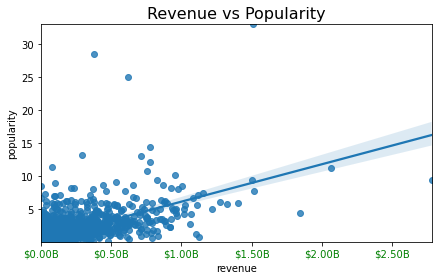

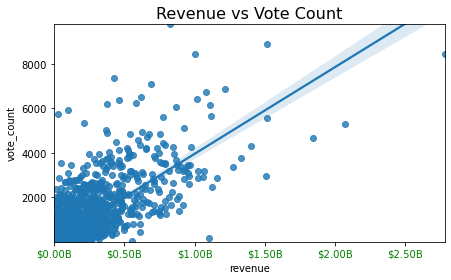

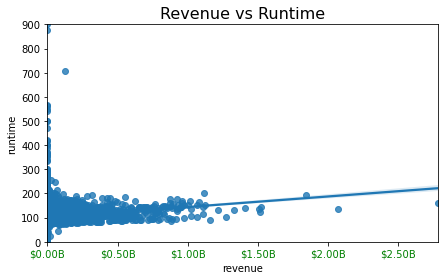

In [28]:
plot_correlation('revenue', 'budget', df_q2, 'Revenue vs Budget in Billions', True);
plot_correlation('revenue', 'popularity', df_q2, 'Revenue vs Popularity', False);
plot_correlation('revenue', 'vote_count', df_q2, 'Revenue vs Vote Count', False);
plot_correlation('revenue', 'runtime', df_q2, 'Revenue vs Runtime', False);

In [29]:
correlations = df_q2.corr()

In [30]:
correlations.iloc[1:, 1:]

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


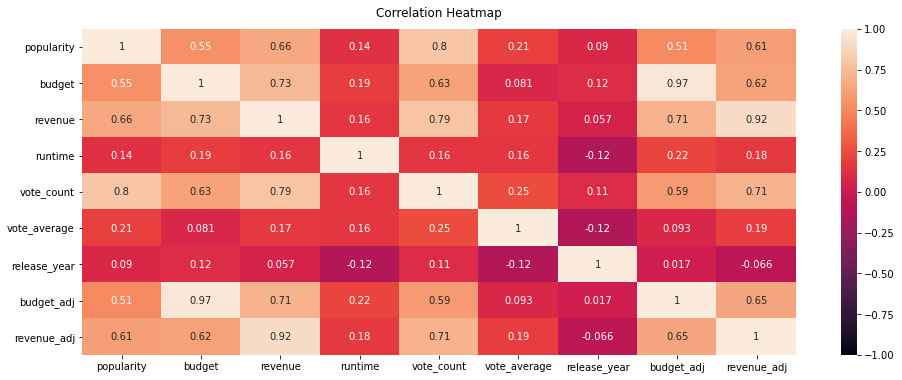

In [31]:
# Code idea is copied from [https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlations.iloc[1:, 1:], vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

<a id='q3'></a>
### Research Question 3 (Q3. Which movies made the most profit, yearly?)

In [32]:
df_q3 = pd.DataFrame()
df_q3['profit'] = df['revenue'] - df['budget']
df_q3['year'] = df['release_year']
df_q3['movie_name'] = df['original_title']
df_q3.head()

,profit,year,movie_name
0,1363528810,2015,Jurassic World
1,228436354,2015,Mad Max: Fury Road
2,185238201,2015,Insurgent
3,1868178225,2015,Star Wars: The Force Awakens
4,1316249360,2015,Furious 7


In [33]:
# df_q3 = df_q3.groupby(['year'], sort=True)['profit'].max()
idxs = df_q3.groupby(['year'], sort=False)['profit'].transform(max) == df_q3['profit']
df_q3 = df_q3[idxs]
df_q3 = df_q3.sort_values(by='year', ascending=True, na_position='first')
df_q3 = df_q3.reset_index()
df_q3.head(5)

,index,profit,year,movie_name
0,10143,48000000,1960,Spartacus
1,10110,211880014,1961,One Hundred and One Dalmatians
2,9849,58500000,1962,Dr. No
3,10438,76398765,1963,From Russia With Love
4,9881,121400000,1964,Goldfinger


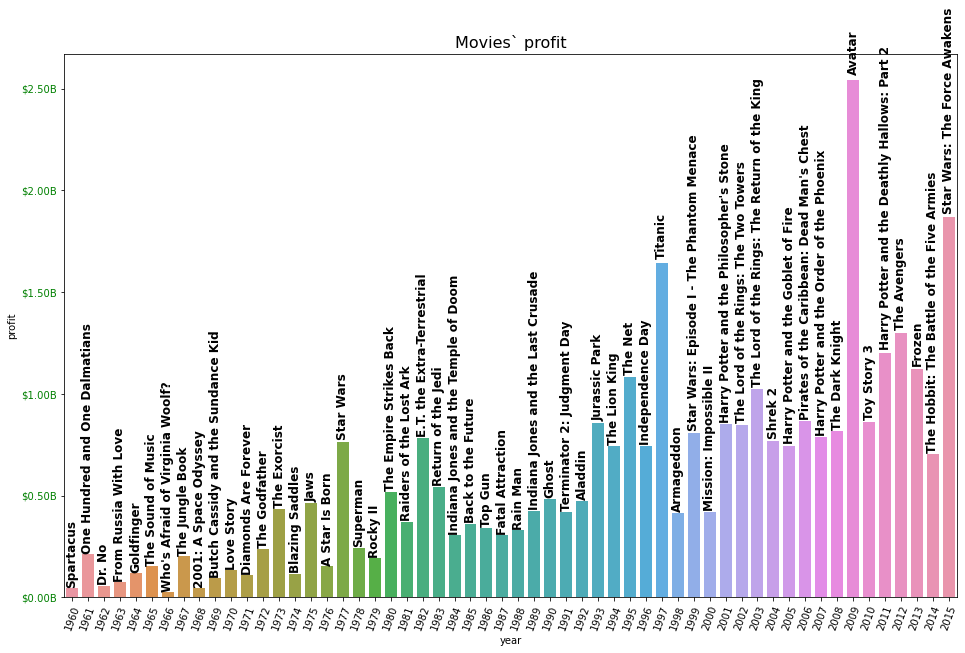

In [34]:
fig, ax1 = plt.subplots(figsize=(16, 10))
ax1.set_title('Movies` profit', fontsize=16)
ax1 = sns.barplot(x='year', y='profit', data=df_q3)
plt.xticks(rotation=70)

ylabels = ['${:,.2f}'.format(x) + 'B' for x in ax1.get_yticks()/1000000000]
ticks_loc = ax1.get_yticks().tolist()
ax1.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax1.set_yticklabels(ylabels)
ax1.yaxis.set_tick_params(which='major', labelcolor='green',
                     labelleft=True, labelright=False)

change_width(ax1, .75)

def autolabel(rects):
    for i in range(0, len(rects)):
        height = rects[i].get_height()        
        ax1.text(rects[i].get_x() + rects[i].get_width() / 2., 
                1.01 * height,
                df_q3.iloc[i]['movie_name'],
                ha='center', va='bottom', rotation=90, color='black', fontdict= { 'fontsize': 12, 'fontweight':'bold'})

autolabel(ax1.patches)
plt.show()

<a id='conclusions'></a>
## Conclusions
Following summarizations I get from three research questions above
 - `Drama` genre movies is the most popular from the below bar plot. However, rarely we can see comedy genre movies can beat the Drama genre movies. `Comedy` genre movies is the second most popular movie genre.
 - Overall, there `20` unique genre movies in the dataset
 - Correaltions beetwen revenue and other tables are as following:
     - Correlation beetwen `revenue` and `vote_count` is the highest `val = (0.79)`;
     - The second and third highest corresponds to `budget(0.73)` and `popularity``(0.66)`, respectively;
     - It seems from the given dataset, `runtime(0.16)` and `vote_average(0.17)` properties doesn't associated with revenue.
 - `Avatar` movive made the most profit, followed by `Star Wars: The Force Awakens` and `Titanic`

30 July, 06:56. Made by Sanatbek Matlatipov